<p>Yiwei Yu 5708729817</p>

In [1]:
import pandas as pd
import numpy as np
import random
from collections import Counter
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
import sklearn.metrics as metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from scipy.special import softmax
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

<h3>1.Supervised, Semi-Supervised, and Unsupervised Learning</h3>

In [2]:
data = pd.read_csv('../data/wdbc.data')
column_tag = ['id','class']
for i in range(0,data.shape[1]-2):
    column_tag.append('attr'+str(i))
data = pd.read_csv('../data/wdbc.data',names = column_tag)

In [3]:
data

,id,class,attr0,attr1,attr2,attr3,attr4,attr5,attr6,attr7,...,attr20,attr21,attr22,attr23,attr24,attr25,attr26,attr27,attr28,attr29
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
Counter(data['class'])

Counter({'M': 212, 'B': 357})

In [5]:

data_M = data[data['class']=='M']
all_ind = list(data_M.index)
train_num = np.ceil(len(all_ind)*0.8)
train_ind = random.sample(list(all_ind),int(train_num))
test_ind = []
for i in all_ind:
    if i not in train_ind:
        test_ind.append(i)

In [6]:
data_B = data[data['class']!='M']
all_ind2 = list(data_B.index)

train_num2 = np.ceil(len(all_ind2)*0.8)
train_ind2 = random.sample(list(all_ind2),int(train_num2))
test_ind2 = []
for i in all_ind2:
    if i not in train_ind2:
        test_ind2.append(i)

In [7]:
train_ind.extend(train_ind2)
train_data = data.iloc[train_ind,:].reset_index().drop('index',axis = 1)
train_data

,id,class,attr0,attr1,attr2,attr3,attr4,attr5,attr6,attr7,...,attr20,attr21,attr22,attr23,attr24,attr25,attr26,attr27,attr28,attr29
0,857637,M,19.210,18.57,125.50,1152.0,0.10530,0.12670,0.132300,0.08994,...,26.14,28.14,170.10,2145.0,0.16240,0.35110,0.38790,0.20910,0.3537,0.08294
1,858986,M,14.250,22.15,96.42,645.7,0.10490,0.20080,0.213500,0.08653,...,17.67,29.51,119.10,959.5,0.16400,0.62470,0.69220,0.17850,0.2844,0.11320
2,895633,M,16.260,21.88,107.50,826.8,0.11650,0.12830,0.179900,0.07981,...,17.73,25.21,113.70,975.2,0.14260,0.21160,0.33440,0.10470,0.2736,0.07953
3,90291,M,14.600,23.29,93.97,664.7,0.08682,0.06636,0.083900,0.05271,...,15.79,31.71,102.20,758.2,0.13120,0.15810,0.26750,0.13590,0.2477,0.06836
4,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.08543,...,15.09,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,882488,B,9.567,15.91,60.21,279.6,0.08464,0.04087,0.016520,0.01667,...,10.51,19.16,65.74,335.9,0.15040,0.09515,0.07161,0.07222,0.2757,0.08178
452,899187,B,11.660,17.07,73.70,421.0,0.07561,0.03630,0.008306,0.01162,...,13.28,19.74,83.61,542.5,0.09958,0.06476,0.03046,0.04262,0.2731,0.06825
453,911320502,B,13.170,18.22,84.28,537.3,0.07466,0.05994,0.048590,0.02870,...,14.90,23.89,95.10,687.6,0.12820,0.19650,0.18760,0.10450,0.2235,0.06925
454,901041,B,13.300,21.57,85.24,546.1,0.08582,0.06373,0.033440,0.02424,...,14.20,29.20,92.94,621.2,0.11400,0.16670,0.12120,0.05614,0.2637,0.06658


In [8]:
Counter(train_data['class'])

Counter({'M': 170, 'B': 286})

In [9]:
test_ind.extend(test_ind2)
test_data = data.iloc[test_ind,:].reset_index().drop('index',axis = 1)
test_data

,id,class,attr0,attr1,attr2,attr3,attr4,attr5,attr6,attr7,...,attr20,attr21,attr22,attr23,attr24,attr25,attr26,attr27,attr28,attr29
0,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
1,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
2,845636,M,16.020,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,...,19.190,33.88,123.80,1150.0,0.11810,0.15510,0.14590,0.09975,0.2948,0.08452
3,849014,M,19.810,22.15,130.00,1260.0,0.09831,0.10270,0.14790,0.09498,...,27.320,30.88,186.80,2398.0,0.15120,0.31500,0.53720,0.23880,0.2768,0.07615
4,8511133,M,15.340,14.26,102.50,704.4,0.10730,0.21350,0.20770,0.09756,...,18.070,19.08,125.10,980.9,0.13900,0.59540,0.63050,0.23930,0.4667,0.09946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,918465,B,12.070,13.44,77.83,445.2,0.11000,0.09009,0.03781,0.02798,...,13.450,15.77,86.92,549.9,0.15210,0.16320,0.16220,0.07393,0.2781,0.08052
109,921092,B,7.729,25.49,47.98,178.8,0.08098,0.04878,0.00000,0.00000,...,9.077,30.92,57.17,248.0,0.12560,0.08340,0.00000,0.00000,0.3058,0.09938
110,923465,B,10.820,24.21,68.89,361.6,0.08192,0.06602,0.01548,0.00816,...,13.030,31.45,83.90,505.6,0.12040,0.16330,0.06194,0.03264,0.3059,0.07626
111,925311,B,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905


In [10]:
Counter(test_data['class'])

Counter({'M': 42, 'B': 71})

In [11]:
data.iloc[:,2:]

,attr0,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,...,attr20,attr21,attr22,attr23,attr24,attr25,attr26,attr27,attr28,attr29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [12]:
data.iloc[:,2:] = preprocessing.MinMaxScaler().fit_transform(data.iloc[:,2:]) 

In [13]:
def generate_data(num):
    random.seed(num)
    data_M = data[data['class']=='M']
    all_ind = list(data_M.index)
    train_num = np.ceil(len(all_ind)*0.8)
    train_ind = random.sample(list(all_ind),int(train_num))
    test_ind = []
    for i in all_ind:
        if i not in train_ind:
            test_ind.append(i)
    data_B = data[data['class']!='M']
    all_ind2 = list(data_B.index)

    train_num2 = np.ceil(len(all_ind2)*0.8)
    train_ind2 = random.sample(list(all_ind2),int(train_num2))
    test_ind2 = []
    for i in all_ind2:
        if i not in train_ind2:
            test_ind2.append(i)
    train_ind.extend(train_ind2)
    train_data = data.iloc[train_ind,:].reset_index().drop('index',axis = 1)
    test_ind.extend(test_ind2)
    test_data = data.iloc[test_ind,:].reset_index().drop('index',axis = 1)
    train_data.loc[train_data["class"] == "M","class"] = 1
    train_data.loc[train_data["class"] == "B","class"] = 0
    test_data.loc[test_data["class"] == "M","class"] = 1
    test_data.loc[test_data["class"] == "B","class"] = 0
    return train_data,test_data

<h3>(b).i Supervised Learning:</h3>

In [1017]:
accuracy_l = []
precision_l = []
recall_l = []
f1_l = []
auc_l = []
cm = []

accuracy_l2 = []
precision_l2 = []
recall_l2 = []
f1_l2 = []
auc_l2 = []
cm2 = []
fp = 0
tp = 0
fp2 = 0
tp2 = 0

for s_ in range(1,31):
    print("Round: "+str(s_))
    train1,test1 = generate_data(s_)
    #train1,test1 = generate_data(seed_list[s_-1])
    train_data_x = train1.iloc[:,2:]
    train_data_y = train1.iloc[:,1].astype('int')
    
    test_data_x = test1.iloc[:,2:]
    test_data_y = test1.iloc[:,1].astype('int')
    
    trainx_normal = train_data_x
    testx_normal = test_data_x
    
    svc = LinearSVC(penalty = 'l1',dual = False,max_iter = 120000)
    model_supervised = GridSearchCV(svc,{'C':[10 ** i for i in range(-3,6)]},cv = 5)
    model_supervised.fit(trainx_normal, train_data_y)
    
    predict_y = model_supervised.predict(trainx_normal)
    false_p,true_p,th = metrics.roc_curve(train_data_y,model_supervised.decision_function(trainx_normal),pos_label = 1)

    accuracy_l.append(accuracy_score(train_data_y,predict_y))
    precision_l.append(precision_score(train_data_y,predict_y))
    recall_l.append(recall_score(train_data_y,predict_y))
    f1_l.append(f1_score(train_data_y,predict_y))

    predict_y2 = model_supervised.predict(testx_normal)
    false_p2,true_p2,th2 = metrics.roc_curve(test_data_y,model_supervised.decision_function(testx_normal),pos_label = 1)
    
    print('Train Accuracy:')
    print(accuracy_score(train_data_y,predict_y))
    
    print('Test Accuracy:')
    print(accuracy_score(test_data_y,predict_y2))
    #print(precision_score(test_data_y,predict_y2))
    accuracy_l2.append(accuracy_score(test_data_y,predict_y2))
    precision_l2.append(precision_score(test_data_y,predict_y2))
    recall_l2.append(recall_score(test_data_y,predict_y2))
    f1_l2.append(f1_score(test_data_y,predict_y2))
    print("   ")
    print("Best CV Score:")
    print(model_supervised.best_score_)
    print("Best Parameter:")
    print(model_supervised.best_params_)
    print("   ")
    

    if s_ == 3:
        cm = confusion_matrix(train_data_y,predict_y)
        cm2 = confusion_matrix(test_data_y,predict_y2)
        fp = false_p
        tp = true_p
        fp2 = false_p2
        tp2 = true_p2
    auc_l.append(metrics.auc(false_p, true_p))
    auc_l2.append(metrics.auc(false_p2, true_p2))
    print('-------------------------------------------------------------------------------')

    

Round: 1
Train Accuracy:
0.9824561403508771
Test Accuracy:
0.9734513274336283
   
Best CV Score:
0.9736980410893455
Best Parameter:
{'C': 1}
   
-------------------------------------------------------------------------------
Round: 2
Train Accuracy:
0.9846491228070176
Test Accuracy:
0.9646017699115044
   
Best CV Score:
0.9693502150023889
Best Parameter:
{'C': 1}
   
-------------------------------------------------------------------------------
Round: 3
Train Accuracy:
0.993421052631579
Test Accuracy:
0.9734513274336283
   
Best CV Score:
0.9736741519350215
Best Parameter:
{'C': 10}
   
-------------------------------------------------------------------------------
Round: 4
Train Accuracy:
0.9824561403508771
Test Accuracy:
0.9734513274336283
   
Best CV Score:
0.9758958432871477
Best Parameter:
{'C': 1}
   
-------------------------------------------------------------------------------
Round: 5
Train Accuracy:
0.9846491228070176
Test Accuracy:
0.9823008849557522
   
Best CV Score:
0.9

Round.3th
Confusion Matrix(Training): 
[[285   1]
 [  2 168]]


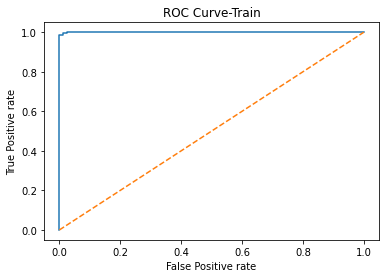

 
Confusion Matrix(Testing): 
[[71  0]
 [ 3 39]]


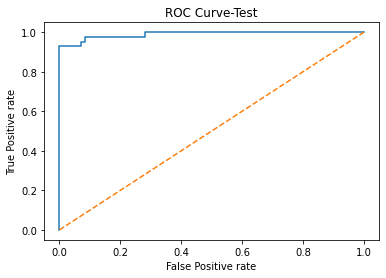

In [1018]:
print('Round.3th')
print("Confusion Matrix(Training): ")
print(cm)

plt.title("ROC Curve-Train")
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.plot(fp,tp)
plt.plot([0, 1], [0, 1],'--')
plt.show()
print(" ")

print("Confusion Matrix(Testing): ")
print(cm2)
plt.title("ROC Curve-Test")
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.plot(fp2,tp2)
plt.plot([0, 1], [0, 1],'--')
plt.show()

In [1019]:
stats = {"Type":"Train","Accuracy(avg)":np.mean(accuracy_l),"Precision(avg)":np.mean(precision_l),
        "Recall(avg)":np.mean(recall_l),"F1(avg)":np.mean(f1_l),"Auc(avg)":np.mean(auc_l)}
stats2 = {"Type":"Test","Accuracy(avg)":np.mean(accuracy_l2),"Precision(avg)":np.mean(precision_l2),
        "Recall(avg)":np.mean(recall_l2),"F1(avg)":np.mean(f1_l2),"Auc(avg)":np.mean(auc_l2)}

In [1020]:
stats_result_super = pd.DataFrame([stats,stats2])
stats_result_super

,Type,Accuracy(avg),Precision(avg),Recall(avg),F1(avg),Auc(avg)
0,Train,0.984942,0.989193,0.970196,0.979578,0.997948
1,Test,0.971091,0.976447,0.946032,0.960509,0.992041


<h3>(b).ii Semi-Supervised Learning/ Self-training:</h3>

In [759]:
def generate_data2(num):
    traina,testa = generate_data(num)
    random.seed(num)
    data_M_s = traina[traina['class']==1]
    all_ind_s = list(data_M_s.index)
    train_num_s = np.ceil(len(all_ind_s)*0.5)
    train_ind_s = random.sample(list(all_ind_s),int(train_num_s))


    data_B_u = traina[traina['class']!=1]
    all_ind_u = list(data_B_u.index)
    train_num_u = np.ceil(len(all_ind_u)*0.5)
    train_ind_u = random.sample(list(all_ind_u),int(train_num_u))

    train_ind_s.extend(train_ind_u)

    unlabled_ind = []
    for i in traina.index:
        if i not in train_ind_s:
            unlabled_ind.append(i)
        
    label_data = traina.iloc[train_ind_s,:].reset_index().drop('index',axis = 1)
    unlable_data = traina.iloc[unlabled_ind,:].reset_index().drop('index',axis = 1)
    
    return label_data,unlable_data,traina,testa

In [761]:
accuracy_l = []
precision_l = []
recall_l = []
f1_l = []
auc_l = []
cm = []

accuracy_l2 = []
precision_l2 = []
recall_l2 = []
f1_l2 = []
auc_l2 = []
cm2 = []

for s_ in range(1,31):
    print("Round: "+str(s_))
    lable,unlable,train1,test1 = generate_data2(s_*5+100)
    lable_x = lable.iloc[:,2:]
    lable_y = list(lable.iloc[:,1].astype('int'))
    
    unlable_x = unlable.iloc[:,2:]
    unlable_y = list(unlable.iloc[:,1].astype('int'))
    
    lable_normal = list(np.array(lable_x))
    unlable_normal = list(np.array(unlable_x))
    
    
    svc = LinearSVC(penalty = 'l1',dual = False,max_iter = 10000)
    model_semi = GridSearchCV(svc,{'C':[10 ** i for i in range(-2,5)]},cv = 5,n_jobs = -1)
    model_semi.fit(lable_normal, lable_y)
    
    predict_y = model_semi.predict(lable_normal)
    
    
    dist_all = model_semi.decision_function(unlable_normal)
    dist_dict = {}
    for i in range(0,len(dist_all)):
        dist_dict[i] = dist_all[i]
    sort_dist = sorted(dist_dict.items(),key = lambda x:abs(x[1])) 
    while len(sort_dist)>0:
#         if len(sort_dist)%50 ==0:
#             print(len(sort_dist))
        far1 = sort_dist.pop()[0]
        far_data = unlable_normal[far1].reshape(1, -1)
        far_y = model_semi.predict(far_data)[0]

        lable_normal.append(unlable_normal[far1])
        lable_y.append(far_y)
        model_semi = GridSearchCV(svc,{'C':[10 ** i for i in range(-2,5)]},cv = 5,n_jobs = -1)
        model_semi.fit(lable_normal, lable_y)
        
        
    train_data_x = train1.iloc[:,2:]
    train_data_y = train1.iloc[:,1].astype('int')
    
    test_data_x = test1.iloc[:,2:]
    test_data_y = test1.iloc[:,1].astype('int')
    
    trainx_normal = train_data_x
    testx_normal = test_data_x       
    
        
    predict_y = model_semi.predict(trainx_normal)
    false_p,true_p,th = metrics.roc_curve(train_data_y,model_semi.decision_function(trainx_normal),pos_label = 1)

    accuracy_l.append(accuracy_score(train_data_y,predict_y))
    precision_l.append(precision_score(train_data_y,predict_y))
    recall_l.append(recall_score(train_data_y,predict_y))
    f1_l.append(f1_score(train_data_y,predict_y))

    predict_y2 = model_semi.predict(testx_normal)
    false_p2,true_p2,th2 = metrics.roc_curve(test_data_y,model_semi.decision_function(testx_normal),pos_label = 1)
    

    accuracy_l2.append(accuracy_score(test_data_y,predict_y2))
    precision_l2.append(precision_score(test_data_y,predict_y2))
    recall_l2.append(recall_score(test_data_y,predict_y2))
    f1_l2.append(f1_score(test_data_y,predict_y2))
    
    print('Train Accuracy:')
    print(accuracy_score(train_data_y,predict_y))
    
    print('Test Accuracy:')
    print(accuracy_score(test_data_y,predict_y2))
    
    print("Best CV Score:")
    print(model_semi.best_score_)
    print("Best Parameter:")
    print(model_semi.best_params_)
    print("   ")
    

    if s_ == 3:
        cm = confusion_matrix(train_data_y,predict_y)
        cm2 = confusion_matrix(test_data_y,predict_y2)
    auc_l.append(metrics.auc(false_p, true_p))
    auc_l2.append(metrics.auc(false_p2, true_p2))
    print('-------------------------------------------------------------------------------')

Round: 1
Train Accuracy:
0.9714912280701754
Test Accuracy:
0.9734513274336283
Best CV Score:
0.9846870520783565
Best Parameter:
{'C': 10}
   
-------------------------------------------------------------------------------
Round: 2
Train Accuracy:
0.9868421052631579
Test Accuracy:
0.9469026548672567
Best CV Score:
0.9802675585284281
Best Parameter:
{'C': 10}
   
-------------------------------------------------------------------------------
Round: 3
Train Accuracy:
0.9802631578947368
Test Accuracy:
0.9734513274336283
Best CV Score:
0.9978260869565216
Best Parameter:
{'C': 10}
   
-------------------------------------------------------------------------------
Round: 4
Train Accuracy:
0.9802631578947368
Test Accuracy:
0.9734513274336283
Best CV Score:
0.9824414715719063
Best Parameter:
{'C': 1}
   
-------------------------------------------------------------------------------
Round: 5
Train Accuracy:
0.9780701754385965
Test Accuracy:
0.9557522123893806
Best CV Score:
0.9758958432871477
B

Round.3th
Confusion Matrix(Training): 
[[285   1]
 [  8 162]]


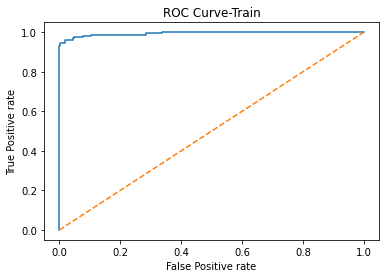

 
Confusion Matrix(Testing): 
[[70  1]
 [ 2 40]]


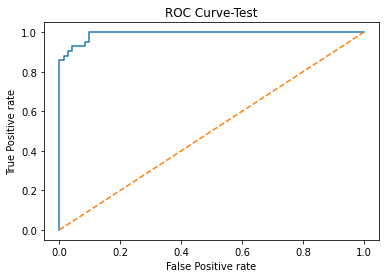

In [762]:
print('Round.3th')
print("Confusion Matrix(Training): ")
print(cm)

plt.title("ROC Curve-Train")
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.plot(false_p, true_p)
plt.plot([0, 1], [0, 1],'--')
plt.show()
print(" ")

print("Confusion Matrix(Testing): ")
print(cm2)
plt.title("ROC Curve-Test")
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.plot(false_p2, true_p2)
plt.plot([0, 1], [0, 1],'--')
plt.show()

In [763]:
stats = {"Type":"Train","Accuracy(avg)":np.mean(accuracy_l),"Precision(avg)":np.mean(precision_l),
        "Recall(avg)":np.mean(recall_l),"F1(avg)":np.mean(f1_l),"Auc(avg)":np.mean(auc_l)}
stats2 = {"Type":"Test","Accuracy(avg)":np.mean(accuracy_l2),"Precision(avg)":np.mean(precision_l2),
        "Recall(avg)":np.mean(recall_l2),"F1(avg)":np.mean(f1_l2),"Auc(avg)":np.mean(auc_l2)}

In [764]:
stats_result = pd.DataFrame([stats,stats2])
stats_result

,Type,Accuracy(avg),Precision(avg),Recall(avg),F1(avg),Auc(avg)
0,Train,0.977705,0.988594,0.951373,0.969389,0.994607
1,Test,0.960767,0.961622,0.931746,0.946248,0.989627


In [1013]:
#restore stats data
stats_result_semi = pd.DataFrame([{"Type":"Train","Accuracy(avg)":0.977705,"Precision(avg)":0.988594,
        "Recall(avg)":0.951373,"F1(avg)":0.969389,"Auc(avg)":0.994607},
                      {"Type":"Test","Accuracy(avg)":0.960767,"Precision(avg)":0.961622,
        "Recall(avg)":0.931746,"F1(avg)":0.946248,"Auc(avg)":0.989627}])
stats_result_semi

,Type,Accuracy(avg),Precision(avg),Recall(avg),F1(avg),Auc(avg)
0,Train,0.977705,0.988594,0.951373,0.969389,0.994607
1,Test,0.960767,0.961622,0.931746,0.946248,0.989627


<h3>(b)iii.Unsupervised Learning:</h3>

<p><b>A.</b>Run the k-means algorithm multiple times. Make sure that you initialize
the algoritm randomly. How do you make sure that the algorithm was
not trapped in a local minimum?</p>
<p><b>Answer:</b>To avoid the local minimum, we can set the n_init = 20 to increase the number of time run with different centroid seeds.</p>

In [14]:
accuracy_l = []
precision_l = []
recall_l = []
f1_l = []
auc_l = []
cm = []

accuracy_l2 = []
precision_l2 = []
recall_l2 = []
f1_l2 = []
auc_l2 = []
cm2 = []

for num in range(1,31):
    traink,testk = generate_data(num)
    train_data_xk = traink.iloc[:,2:]
    train_data_yk = traink.iloc[:,1].astype('int')
        
    test_data_xk = testk.iloc[:,2:]
    test_data_yk = testk.iloc[:,1].astype('int')
    model_kmeans = KMeans(n_clusters = 2,random_state = num,n_init = 20).fit(train_data_xk)
    dist_all = model_kmeans.transform(train_data_xk)
    dist_0 = sorted([(i,dist_all[i][0]) for i in range(0,len(dist_all))],key = lambda x:x[1])[:30]
    dist_1 = sorted([(i,dist_all[i][1]) for i in range(0,len(dist_all))],key = lambda x:x[1])[:30]
    lables_0 = []
    for i in dist_0:
        lables_0.append(train_data_yk.loc[i[0]])
    
    lables_1 = []
    for i in dist_1:
        lables_1.append(train_data_yk.loc[i[0]])
    
    cluster0 = Counter(lables_0).most_common()[0][0]
    cluster1 = Counter(lables_1).most_common()[0][0]

    ind_0 = np.where(model_kmeans.labels_ == 0)
    ind_1 = np.where(model_kmeans.labels_ == 1)
    y_cal = train_data_yk.copy()

    for i in ind_0:
        y_cal.loc[i] = cluster0
    for i in ind_1:
        y_cal.loc[i] = cluster1
        
    accuracy_l.append(accuracy_score(train_data_yk,y_cal))
    precision_l.append(precision_score(train_data_yk,y_cal))
    recall_l.append(recall_score(train_data_yk,y_cal))
    f1_l.append(f1_score(train_data_yk,y_cal))
    
    #####Test
    test_ind_0 = np.where(model_kmeans.predict(test_data_xk) == 0)
    test_ind_1 = np.where(model_kmeans.predict(test_data_xk) == 1)
    test_y_cal = test_data_yk.copy()

    for i in test_ind_0:
        test_y_cal.loc[i] = cluster0
    for i in test_ind_1:
        test_y_cal.loc[i] = cluster1
        
    accuracy_l2.append(accuracy_score(test_data_yk,test_y_cal))
    precision_l2.append(precision_score(test_data_yk,test_y_cal))
    recall_l2.append(recall_score(test_data_yk,test_y_cal))
    f1_l2.append(f1_score(test_data_yk,test_y_cal))        
        
        
    if num == 24:
        cm = confusion_matrix(train_data_yk,y_cal)
        cm2 = confusion_matrix(test_data_yk,test_y_cal)
    false_p,true_p,th = metrics.roc_curve(train_data_yk,[i[1] for i in softmax(dist_all)],pos_label = cluster0)
    dist_all2 = model_kmeans.transform(test_data_xk)
    false_p2,true_p2,th2 = metrics.roc_curve(test_data_yk,[i[1] for i in softmax(dist_all2)],pos_label = cluster0)
    auc_l.append(metrics.auc(false_p, true_p))
    auc_l2.append(metrics.auc(false_p2, true_p2))

Round.24th
Confusion Matrix(Training): 
[[280   6]
 [ 26 144]]


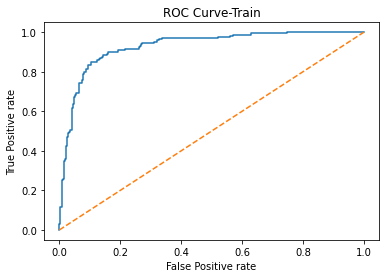

 
Confusion Matrix(Testing): 
[[68  3]
 [ 6 36]]


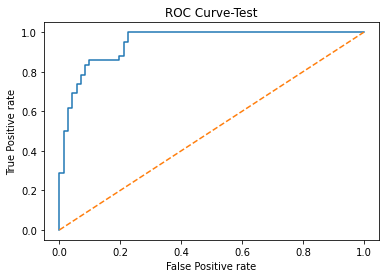

In [15]:
print('Round.24th')
print("Confusion Matrix(Training): ")
print(cm)

plt.title("ROC Curve-Train")
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.plot(false_p,true_p)
plt.plot([0, 1], [0, 1],'--')
plt.show()
print(" ")

print("Confusion Matrix(Testing): ")
print(cm2)
plt.title("ROC Curve-Test")
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.plot(false_p2,true_p2)
plt.plot([0, 1], [0, 1],'--')
plt.show()

In [16]:
stats = {"Type":"Train","Accuracy(avg)":np.mean(accuracy_l),"Precision(avg)":np.mean(precision_l),
        "Recall(avg)":np.mean(recall_l),"F1(avg)":np.mean(f1_l),"Auc(avg)":np.mean(auc_l)}
stats2 = {"Type":"Test","Accuracy(avg)":np.mean(accuracy_l2),"Precision(avg)":np.mean(precision_l2),
        "Recall(avg)":np.mean(recall_l2),"F1(avg)":np.mean(f1_l2),"Auc(avg)":np.mean(auc_l2)}

In [17]:
stats_result_unsuper = pd.DataFrame([stats,stats2])
stats_result_unsuper

,Type,Accuracy(avg),Precision(avg),Recall(avg),F1(avg),Auc(avg)
0,Train,0.928143,0.952782,0.849608,0.898125,0.914242
1,Test,0.924189,0.947221,0.843651,0.891783,0.914386


<h3>(b)iv.Spectral Clustering:</h3>

In [1021]:
accuracy_l = []
precision_l = []
recall_l = []
f1_l = []
auc_l = []
cm = []

accuracy_l2 = []
precision_l2 = []
recall_l2 = []
f1_l2 = []
auc_l2 = []
cm2 = []

for num in range(1,31):
    
    traink,testk = generate_data(num*2)
    train_data_xk = traink.iloc[:,2:]
    train_data_yk = traink.iloc[:,1].astype('int')

    test_data_xk = testk.iloc[:,2:]
    test_data_yk = testk.iloc[:,1].astype('int')
    #train_data_xk = MinMaxScaler().fit_transform(train_data_xk)
    model_sc = SpectralClustering(n_clusters=2,assign_labels='kmeans',random_state=num,affinity = 'rbf').fit(train_data_xk)
#     knn_model = KNeighborsClassifier(n_neighbors=1)
#     knn_model.fit(train_data_xk,model_sc.fit_predict(train_data_xk))
#     all_labels = knn_model.predict(train_data_xk)
    
    dist_0 = list(np.where(model_sc.labels_==0)[0])
    dist_1 = list(np.where(model_sc.labels_==1)[0])
    lables_0 = []
    for i in dist_0:
        lables_0.append(train_data_yk.loc[i])

    lables_1 = []
    for i in dist_1:
        lables_1.append(train_data_yk.loc[i])
    cluster0 = Counter(lables_0).most_common()[0][0]
    cluster1 = Counter(lables_1).most_common()[0][0]


    y_cal = train_data_yk.copy()

    for i in dist_0:
        y_cal.loc[i] = cluster0
    for i in dist_1:
        y_cal.loc[i] = cluster1
        
#     print('train')    
#     print(accuracy_score(train_data_yk,y_cal))
    accuracy_l.append(accuracy_score(train_data_yk,y_cal))
    precision_l.append(precision_score(train_data_yk,y_cal))
    recall_l.append(recall_score(train_data_yk,y_cal))
    f1_l.append(f1_score(train_data_yk,y_cal))
    
    ##test
    knn_model = KNeighborsClassifier(n_neighbors=1)
    knn_model.fit(train_data_xk,model_sc.fit_predict(train_data_xk))
    all_labels = knn_model.predict(test_data_xk)
    dist_0 = list(np.where(all_labels==0)[0])
    dist_1 = list(np.where(all_labels==1)[0])
    lables_0 = []
    for i in dist_0:
        lables_0.append(test_data_yk.loc[i])

    lables_1 = []
    for i in dist_1:
        lables_1.append(test_data_yk.loc[i])
    cluster0 = Counter(lables_0).most_common()[0][0]
    cluster1 = Counter(lables_1).most_common()[0][0]


    test_y_cal = test_data_yk.copy()

    for i in dist_0:
        test_y_cal.loc[i] = cluster0
    for i in dist_1:
        test_y_cal.loc[i] = cluster1
    

    accuracy_l2.append(accuracy_score(test_data_yk,test_y_cal))
    precision_l2.append(precision_score(test_data_yk,test_y_cal))
    recall_l2.append(recall_score(test_data_yk,test_y_cal))
    f1_l2.append(f1_score(test_data_yk,test_y_cal))   
    
    
    ##compute roc and auc  for training
    fpr_l = []
    tpr_l = []
    for ths in [0.1,0.2,0.3,0.4,0.5,0.6,1.0]:
        dist_0 = list(np.where(model_sc.labels_==0)[0])
        dist_1 = list(np.where(model_sc.labels_==1)[0])
        lables_0 = []
        for i in dist_0:
            lables_0.append(train_data_yk.loc[i])

        lables_1 = []
        for i in dist_1:
            lables_1.append(train_data_yk.loc[i])

        if Counter(lables_0)[1]/(Counter(lables_0)[1]+Counter(lables_0)[0]) >ths:
            cluster0 = 1
        else:
            cluster0 = 0

        if Counter(lables_1)[1]/(Counter(lables_1)[1]+Counter(lables_1)[0]) >ths:
            cluster1 = 1
        else:
            cluster1 = 0




        y_cal = train_data_yk.copy()

        for i in dist_0:
            y_cal.loc[i] = cluster0
        for i in dist_1:
            y_cal.loc[i] = cluster1
            

        cm_t = confusion_matrix(train_data_yk,y_cal)
        if ths == 0.5:
            cm = cm_t
        #print(cm_t)
        fpr_l.append(cm_t[0][1]/(cm_t[0][1]+cm_t[0][0]))
        tpr_l.append(cm_t[1][1]/(cm_t[1][1]+cm_t[1][0]))
    auc_l.append(metrics.auc(fpr_l, tpr_l))
        
        
    ##compute roc and auc  for testing
    fpr_l2 = []
    tpr_l2 = []
    for ths in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]:
        dist_0 = list(np.where(all_labels==0)[0])
        dist_1 = list(np.where(all_labels==1)[0])
        lables_0 = []
        for i in dist_0:
            lables_0.append(test_data_yk.loc[i])

        lables_1 = []
        for i in dist_1:
            lables_1.append(test_data_yk.loc[i])

        if Counter(lables_0)[1]/(Counter(lables_0)[1]+Counter(lables_0)[0]) >ths:
            cluster0 = 1
        else:
            cluster0 = 0

        if Counter(lables_1)[1]/(Counter(lables_1)[1]+Counter(lables_1)[0]) >ths:
            cluster1 = 1
        else:
            cluster1 = 0




        test_y_cal = test_data_yk.copy()

        for i in dist_0:
            test_y_cal.loc[i] = cluster0
        for i in dist_1:
            test_y_cal.loc[i] = cluster1
            

        cm_test = confusion_matrix(test_data_yk,test_y_cal)
        if ths == 0.5:
            cm2 = cm_test
        #print(cm_t)
        fpr_l2.append(cm_test[0][1]/(cm_test[0][1]+cm_test[0][0]))
        tpr_l2.append(cm_test[1][1]/(cm_test[1][1]+cm_test[1][0]))
        

    auc_l2.append(metrics.auc(fpr_l2, tpr_l2))
    
    

            
    
    


Round.30th
Confusion Matrix(Training): 
[[283   3]
 [ 62 108]]


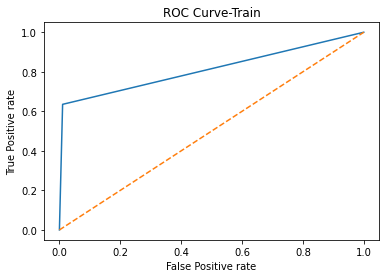

 
Confusion Matrix(Testing): 
[[71  0]
 [19 23]]


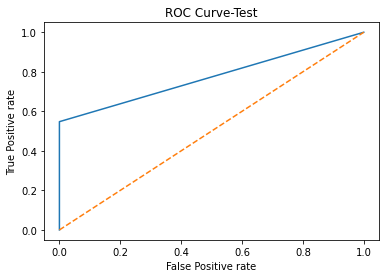

In [1022]:
print('Round.30th')
print("Confusion Matrix(Training): ")
print(cm)

plt.title("ROC Curve-Train")
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.plot(fpr_l,tpr_l)
plt.plot([0, 1], [0, 1],'--')
plt.show()
print(" ")

print("Confusion Matrix(Testing): ")
print(cm2)
plt.title("ROC Curve-Test")
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.plot(fpr_l2,tpr_l2)
plt.plot([0, 1], [0, 1],'--')
plt.show()

In [1023]:
stats = {"Type":"Train","Accuracy(avg)":np.mean(accuracy_l),"Precision(avg)":np.mean(precision_l),
        "Recall(avg)":np.mean(recall_l),"F1(avg)":np.mean(f1_l),"Auc(avg)":np.mean(auc_l)}
stats2 = {"Type":"Test","Accuracy(avg)":np.mean(accuracy_l2),"Precision(avg)":np.mean(precision_l2),
        "Recall(avg)":np.mean(recall_l2),"F1(avg)":np.mean(f1_l2),"Auc(avg)":np.mean(auc_l2)}

In [1024]:
stats_result_spec = pd.DataFrame([stats,stats2])
stats_result_spec

,Type,Accuracy(avg),Precision(avg),Recall(avg),F1(avg),Auc(avg)
0,Train,0.866886,0.984047,0.653725,0.784535,0.823658
1,Test,0.866372,0.995551,0.643651,0.777587,0.820886


<h3>(b).v Compare the results
you obtained by those methods</h3>

<p> Based on results obtained by those methods, the Supervised Learning model performs the best(Train:0.98 Test:0.97) on both training and testing dataset with the highest accuracy (Supervised Learning > Semi-Supervised Learning > Unsupervised Learning(K-means) > Spectral Clustering). The supervised learning model is more accurate than unsupervised and self-training because there are more useful infomation(labels) provided during the training phase, but the unsupervised learning model make predictions only based on the similiarities and differences of the unlabeled data. There's little difference between the average accuracy of the supervised learning and semi-supervised learning.</p>

In [1029]:
print("Supervised Learning")
print(stats_result_super)
print("---------------------------------------------------------------------------")
print("Semi-Supervised Learning")
print(stats_result_semi)
print("---------------------------------------------------------------------------")
print("Unsupervised Learning")
print(stats_result_unsuper)
print("---------------------------------------------------------------------------")
print("Spectral Clustering")
print(stats_result_spec)

Supervised Learning
    Type  Accuracy(avg)  Precision(avg)  Recall(avg)   F1(avg)  Auc(avg)
0  Train       0.984942        0.989193     0.970196  0.979578  0.997948
1   Test       0.971091        0.976447     0.946032  0.960509  0.992041
---------------------------------------------------------------------------
Semi-Supervised Learning
    Type  Accuracy(avg)  Precision(avg)  Recall(avg)   F1(avg)  Auc(avg)
0  Train       0.977705        0.988594     0.951373  0.969389  0.994607
1   Test       0.960767        0.961622     0.931746  0.946248  0.989627
---------------------------------------------------------------------------
Unsupervised Learning
    Type  Accuracy(avg)  Precision(avg)  Recall(avg)   F1(avg)  Auc(avg)
0  Train       0.928216        0.952986     0.849608  0.898217  0.914232
1   Test       0.924189        0.947221     0.843651  0.891783  0.914375
---------------------------------------------------------------------------
Spectral Clustering
    Type  Accuracy(avg)  Pre

<h2>2.Active Learning Using Support Vector Machines</h2>

In [847]:
data2 = pd.read_csv('../data/data_banknote_authentication.txt',names = ['Variance','Skewness','Curtosis','Entropy','Class'])

In [848]:
random.seed(222)
all_ind = list(data2.index)
trainning_index = random.sample(list(all_ind),900)
testing_index = []
for i in all_ind:
    if i not in trainning_index:
        testing_index.append(i)

In [849]:
train_data_svm = data2.iloc[trainning_index,:].reset_index().drop('index',axis = 1)
train_data_svm

,Variance,Skewness,Curtosis,Entropy,Class
0,-2.2261,12.5398,2.94380,-3.525800,0
1,2.8261,9.4007,-3.30340,-1.050900,0
2,-1.9667,11.8052,-0.40472,-7.871900,0
3,1.8384,6.0630,0.54723,0.512480,0
4,5.4021,3.1039,-1.15360,1.565100,0
...,...,...,...,...,...
895,-2.0066,-6.7190,9.01620,0.099985,1
896,-4.0218,-8.3040,12.55500,-1.509900,1
897,-3.7573,-8.2916,10.30320,0.380590,1
898,-5.4414,7.2363,0.10938,-7.564200,1


In [850]:
test_data_svm = data2.iloc[testing_index,:].reset_index().drop('index',axis = 1)
test_data_svm

,Variance,Skewness,Curtosis,Entropy,Class
0,3.6216,8.66610,-2.80730,-0.44699,0
1,4.5459,8.16740,-2.45860,-1.46210,0
2,3.8660,-2.63830,1.92420,0.10645,0
3,2.0922,-6.81000,8.46360,-0.60216,0
4,4.6765,-3.38950,3.48960,1.47710,0
...,...,...,...,...,...
467,-2.4100,3.74330,-0.40215,-1.29530,1
468,-1.3887,-4.87730,6.47740,0.34179,1
469,-3.7503,-13.45860,17.59320,-2.77710,1
470,-3.5637,-8.38270,12.39300,-1.28230,1


<h3>2.(b) Repeat each of the following two procedures 50 times. You will have 50 errors for
90 SVMs per each procedure</h3>

In [971]:
def split_data(x,num):
    random.seed(num)
    if num == 0:
        ind_0 = x[x['Class']==0].index
        ind_1 = x[x['Class']==1].index
        all_ind = list(x.index)
        rest_ind = []
        sample_ind0 = random.sample(list(ind_0),5)
        sample_ind1 = random.sample(list(ind_1),5)
        sample_ind0.extend(sample_ind1)
        for i in all_ind:
            if i not in sample_ind0:
                rest_ind.append(i)
            
        my_sample = x.iloc[sample_ind0,:].reset_index().drop('index',axis = 1)
        rest_data = x.iloc[rest_ind,:].reset_index().drop('index',axis = 1)
    else:
        
        all_ind = list(x.index)
        sample_ind = random.sample(list(all_ind),10)
        rest_ind = []
        for i in all_ind:
            if i not in sample_ind:
                rest_ind.append(i)

        my_sample = x.iloc[sample_ind,:].reset_index().drop('index',axis = 1)
        rest_data = x.iloc[rest_ind,:].reset_index().drop('index',axis = 1)
    
    return my_sample,rest_data
    

<h3>2.(b).i Passive</h3>

In [975]:
train_accur = {}
test_accur = {}
for i in range(10,910,10):
    train_accur[i] = []
    test_accur[i] = []
    
for j in range(0,50):
    #print('Avg.Test Error(900): ' + str(sum(test_accur[900]))/len(test_accur[900]))
    sample,rest = split_data(train_data_svm,j)
    for i in range(0,90):
#         print(sample.shape)
#         print(rest.shape)
        sample_x = sample.iloc[:,:-1]
        sample_y = sample.iloc[:,-1]
        svc_model = LinearSVC(penalty = 'l1',dual = False,max_iter = 120000)
        model_passive = GridSearchCV(svc_model,{'C':[10 ** i for i in range(-3,6)]},cv = 5)
        model_passive.fit(sample_x,sample_y)

        predict_y = model_passive.predict(train_data_svm.iloc[:,:-1])
        predict_y2 = model_passive.predict(test_data_svm.iloc[:,:-1])
        train_accur[sample.shape[0]].append(1-accuracy_score(train_data_svm.iloc[:,-1],predict_y))
        test_accur[sample.shape[0]].append(1-accuracy_score(test_data_svm.iloc[:,-1],predict_y2))
        #print(accuracy_score(train_data_svm.iloc[:,-1],predict_y))
        if i== 89:
            sample = sample
        else:
            sample1,rest = split_data(rest,j+1)
            sample = sample.append(sample1)
    print('Round: ' + str(j)+ "       " + 'Avg.Test Error(900): ' + str(sum(test_accur[900])/len(test_accur[900])))


Round: 0       Avg.Test Error(900): 0.008474576271186418
Round: 1       Avg.Test Error(900): 0.008474576271186418
Round: 2       Avg.Test Error(900): 0.0077683615819208835
Round: 3       Avg.Test Error(900): 0.007415254237288116
Round: 4       Avg.Test Error(900): 0.0072033898305084556
Round: 5       Avg.Test Error(900): 0.007062146892655348
Round: 6       Avg.Test Error(900): 0.006961259079903129
Round: 7       Avg.Test Error(900): 0.00715042372881354
Round: 8       Avg.Test Error(900): 0.007062146892655348
Round: 9       Avg.Test Error(900): 0.006991525423728795
Round: 10       Avg.Test Error(900): 0.006933744221879797
Round: 11       Avg.Test Error(900): 0.007238700564971732
Round: 12       Avg.Test Error(900): 0.007170795306388507
Round: 13       Avg.Test Error(900): 0.007112590799031458
Round: 14       Avg.Test Error(900): 0.0072033898305084556
Round: 15       Avg.Test Error(900): 0.00715042372881354
Round: 16       Avg.Test Error(900): 0.007352941176470569
Round: 17       Avg.Tes

<h3>2.(b).i Active</h3>

In [985]:
train_accur2 = {}
test_accur2 = {}
for i in range(10,910,10):
    train_accur2[i] = []
    test_accur2[i] = []
    
for j in range(0,50):
    #print('Round: ' + str(j))
    sample,rest = split_data(train_data_svm,j)
    for i in range(0,90):
#         print(sample.shape)
#         print(rest.shape)
        sample_x = sample.iloc[:,:-1]
        sample_y = sample.iloc[:,-1]
        svc_model = LinearSVC(penalty = 'l1',dual = False,max_iter = 120000)
        model_active = GridSearchCV(svc_model,{'C':[10 ** i for i in range(-3,6)]},cv = 5)
        model_active.fit(sample_x,sample_y)
        
        predict_y = model_active.predict(train_data_svm.iloc[:,:-1])
        predict_y2 = model_active.predict(test_data_svm.iloc[:,:-1])
        train_accur2[sample.shape[0]].append(1-accuracy_score(train_data_svm.iloc[:,-1],predict_y))
        test_accur2[sample.shape[0]].append(1-accuracy_score(test_data_svm.iloc[:,-1],predict_y2))
        if i == 89:
            sample = sample
        else:
        ##compute distance
            dist_all = model_active.decision_function(rest.iloc[:,:-1])
            dist_dict = {}
            for i in range(0,len(dist_all)):
                dist_dict[i] = dist_all[i]
            sort_dist = sorted(dist_dict.items(),key = lambda x:abs(x[1]))[:10]
            new_sample_ind = []
            new_rest_ind = []
            for i in sort_dist:
                new_sample_ind.append(i[0])
            for i in rest.index:
                if i not in new_sample_ind:
                    new_rest_ind.append(i)
            sample1 = rest.iloc[new_sample_ind,:].reset_index().drop('index',axis = 1)
            sample = sample.append(sample1)
            rest = rest.iloc[new_rest_ind,:].reset_index().drop('index',axis = 1)
    print('Round: ' + str(j)+ "       " + 'Avg.Test Error(900): ' + str(sum(test_accur2[900])/len(test_accur2[900])))
            
    



Round: 0       Avg.Test Error(900): 0.008474576271186418
Round: 1       Avg.Test Error(900): 0.01377118644067793
Round: 2       Avg.Test Error(900): 0.015536723163841767
Round: 3       Avg.Test Error(900): 0.01377118644067793
Round: 4       Avg.Test Error(900): 0.012288135593220307
Round: 5       Avg.Test Error(900): 0.011299435028248558
Round: 6       Avg.Test Error(900): 0.010593220338983023
Round: 7       Avg.Test Error(900): 0.011652542372881325
Round: 8       Avg.Test Error(900): 0.011299435028248558
Round: 9       Avg.Test Error(900): 0.010805084745762684
Round: 10       Avg.Test Error(900): 0.010593220338983023
Round: 11       Avg.Test Error(900): 0.011299435028248558
Round: 12       Avg.Test Error(900): 0.0109191655801825
Round: 13       Avg.Test Error(900): 0.010593220338983023
Round: 14       Avg.Test Error(900): 0.01031073446327681
Round: 15       Avg.Test Error(900): 0.010063559322033871
Round: 16       Avg.Test Error(900): 0.009970089730807551
Round: 17       Avg.Test Erro

<h3>(c) Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i and 2(b)ii.</h3>

<p>Based on the learning curve of passive learning, the test error decrease rapidly at the beginning and then decrease slowly over time. For the learning curve of active learning,the test error decrease rapidly at the beginning and then increase slowly over time.. At 900 Training instances, the passive learning is with the lowest avg.test error, and at around 100 Training instances,the active learning is with the lowest avg.test error.</p>


In [979]:
for i in test_accur:
    test_accur[i] = sum(test_accur[i])/len(test_accur[i])
for i in test_accur2:
    test_accur2[i] = sum(test_accur2[i])/len(test_accur2[i])    

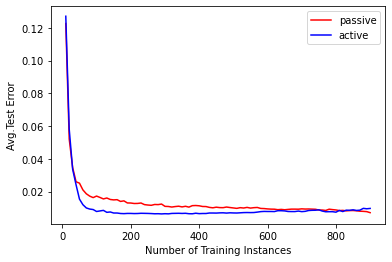

In [1031]:
plt.plot(test_accur.keys(),test_accur.values(),'r',label = 'passive')
plt.plot(test_accur2.keys(),test_accur2.values(),'b',label = 'active')
plt.ylabel('Avg.Test Error')
plt.xlabel('Number of Training Instances')
plt.legend()
plt.show()